In [1]:
import sys
sys.path.append('../')
import re
import os
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import json
from utils.rouge import RougeL
from utils.precision_recall_f1 import precision_recall_f1
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
matplotlib.style.use('ggplot')

## 保持全局长度下计算 label 的 ceil rougel

In [18]:
ori_ceil_rougels = []

zero_ceil_rougel_samples = set()

with open('../input/bridge_entity_mrc_dataset/all_train_full_content.json') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if not line.startswith('{'):
            continue

        sample = json.loads(line.strip())
        ori_ceil_rougels.append(sample['ceil_rougel'])
        
        if sample['ceil_rougel'] == 0:
            zero_ceil_rougel_samples.add(sample['question_id'])
        
        if 0.4 < sample['ceil_rougel'] < 0.5:
            print(sample['question_id'])

 89%|████████▉ | 22107/24843 [00:00<00:00, 27604.63it/s]

Q_16625dnjns
Q_15475sshdd


100%|██████████| 24843/24843 [00:00<00:00, 27557.73it/s]


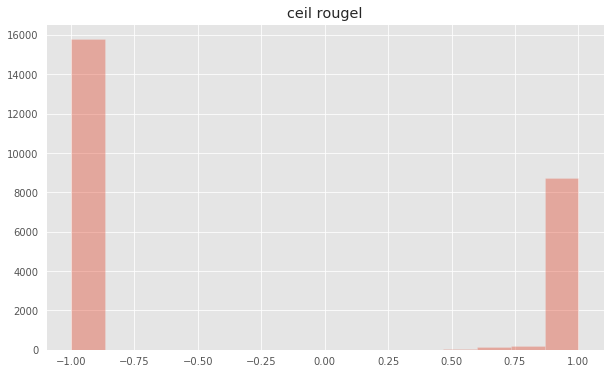

In [19]:
plt.figure(figsize=(10, 6))
sns.distplot(ori_ceil_rougels, kde=False)
plt.title('ceil rougel')
plt.show()

In [20]:
ori_ceil_rougels = np.array(ori_ceil_rougels)

In [21]:
ori_ceil_rougels = ori_ceil_rougels[ori_ceil_rougels > -1]

In [22]:
print('total:', ori_ceil_rougels.shape[0])
print('ceil rougel < 0.20:', ori_ceil_rougels[ori_ceil_rougels < 0.2].shape[0])
print('ceil rougel > 0.95:', ori_ceil_rougels[ori_ceil_rougels > 0.95].shape[0])
print('ceil rougel = 0:', ori_ceil_rougels[ori_ceil_rougels == 0].shape[0])
print('ceil rougel = 1:', ori_ceil_rougels[ori_ceil_rougels == 1].shape[0])

total: 9059
ceil rougel < 0.20: 0
ceil rougel > 0.95: 8461
ceil rougel = 0: 0
ceil rougel = 1: 8425


In [23]:
print(ori_ceil_rougels[ori_ceil_rougels == 1].shape[0] / ori_ceil_rougels.shape[0])
print(np.mean(ori_ceil_rougels))

0.930014350369798
0.9872874920388982


## 训练集的 content 截断后的 ceil rougel

In [24]:
ori_ceil_rougels = []

zero_ceil_rougel_samples = set()

with open('../input/bridge_entity_mrc_dataset/train_max_content_len_1024.json') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if not line.startswith('{'):
            continue

        sample = json.loads(line.strip())
        ori_ceil_rougels.append(sample['ceil_rougel'])
        
        if sample['ceil_rougel'] == 0:
            zero_ceil_rougel_samples.add(sample['question_id'])

100%|██████████| 24342/24342 [00:00<00:00, 37190.46it/s]


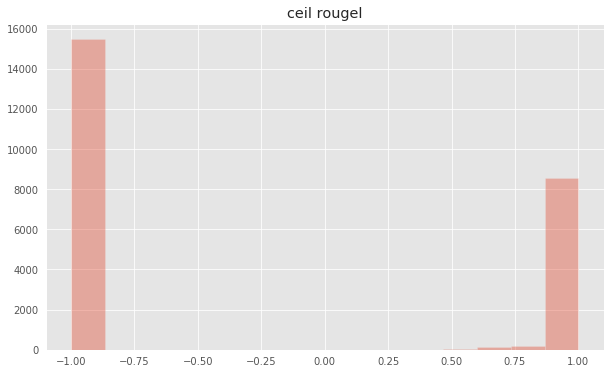

In [25]:
plt.figure(figsize=(10, 6))
sns.distplot(ori_ceil_rougels, kde=False)
plt.title('ceil rougel')
plt.show()

In [26]:
ori_ceil_rougels = np.array(ori_ceil_rougels)
ori_ceil_rougels = ori_ceil_rougels[ori_ceil_rougels > -1]

In [27]:
print('total:', ori_ceil_rougels.shape[0])
print('ceil rougel < 0.20:', ori_ceil_rougels[ori_ceil_rougels < 0.2].shape[0])
print('ceil rougel > 0.95:', ori_ceil_rougels[ori_ceil_rougels > 0.95].shape[0])
print('ceil rougel = 0:', ori_ceil_rougels[ori_ceil_rougels == 0].shape[0])
print('ceil rougel = 1:', ori_ceil_rougels[ori_ceil_rougels == 1].shape[0])

total: 8873
ceil rougel < 0.20: 0
ceil rougel > 0.95: 8285
ceil rougel = 0: 0
ceil rougel = 1: 8249


In [28]:
print(ori_ceil_rougels[ori_ceil_rougels == 1].shape[0] / ori_ceil_rougels.shape[0])
print(np.mean(ori_ceil_rougels))

0.9296742927983771
0.9872584558999932
